In [1]:
# Assignment: PCA Implementation

# Objective:
# The objective of this assignment is to implement PCA on a given dataset and analyse the results.


# Instructions:
# Download the wine dataset from the UCI Machine Learning Repository
# Load the dataset into a Pandas dataframe.
# Split the dataset into features and target variables.
# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
# Implement PCA on the preprocessed dataset using the scikit-learn library.
# Determine the optimal number of principal components to retain based on the explained variance ratio.
# Visualise the results of PCA using a scatter plot.
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
# Interpret the results of PCA and clustering analysis.
# (https://archive.ics.uci.edu/ml/datasets/Wine).

# Deliverables:
# Jupyter notebook containing the code for the PCA implementation.
# A report summarising the results of PCA and clustering analysis.
# Scatter plot showing the results of PCA.
# A table showing the performance metrics for the clustering algorithm. 

# Additional Information:
# You can use the python programming language.
# You can use any other machine learning libraries or tools as necessary.
# You can use any visualisation libraries or tools as necessary.



In [16]:
import pandas as pd

In [17]:
wine_data = pd.read_csv('wine.csv')
wine_data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [19]:
X = wine_data.iloc[:, 1:]  
y = wine_data.iloc[:, 0]

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [25]:
explained_variance = pca.explained_variance_ratio_.cumsum()

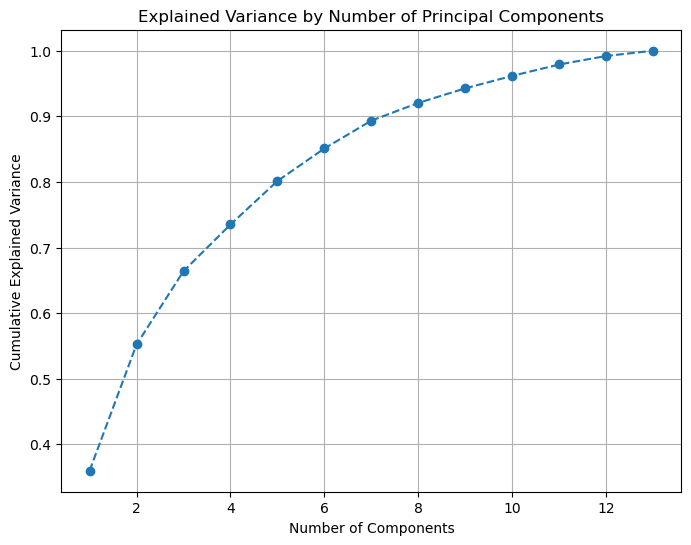

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

In [27]:
import seaborn as sns

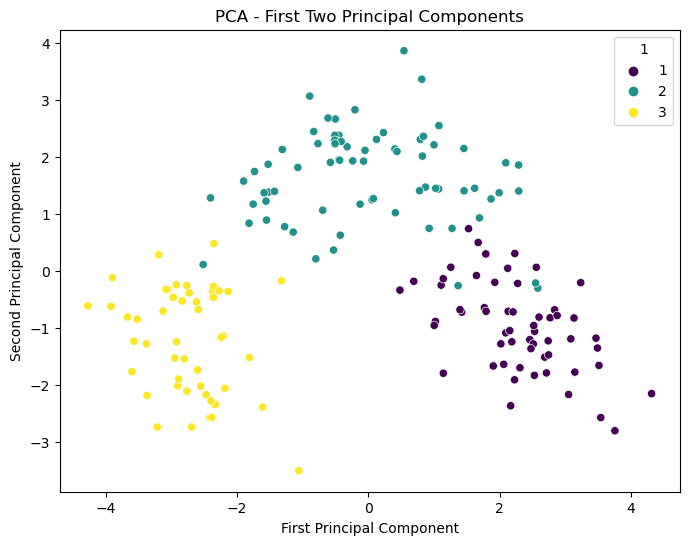

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Principal Components')
plt.show()

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :2]) 
clusters = kmeans.predict(X_pca[:, :2])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


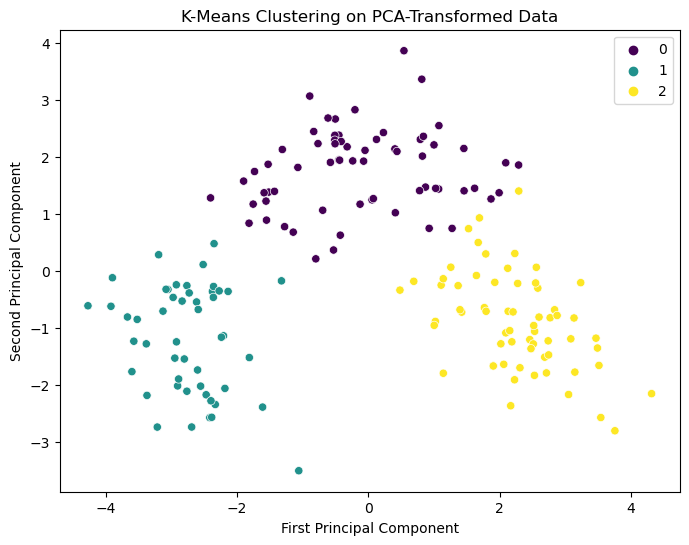

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.show()

In [33]:
# report:

# The optimal number of principal components based on the explained variance ratio.
# The visualization of the PCA-transformed data.
# The clustering performance and interpretation of the clusters.